In [3]:
import cv2
import matplotlib.pyplot as plt
import json

{'asset': {'format': 'png', 'id': '010eb4ebdb1e00f5d81f687ddcff37d0', 'name': 'dangxiao_1128_dongzu%5B00_03_41%5D%5B20211201-170141%5D.png', 'path': "file:C:/Users/Chen'lu'ying/Pictures/QQplayerPic/dangxiao_1128_dongzu%5B00_03_41%5D%5B20211201-170141%5D.png", 'size': {'width': 1920, 'height': 1080}, 'state': 2, 'type': 1}, 'regions': [{'id': 'j9mgJWPfB', 'type': 'RECTANGLE', 'tags': ['玩手机'], 'boundingBox': {'height': 257.76002197265626, 'width': 241.84446754920336, 'left': 964.1386846883786, 'top': 434.3400054931641}, 'points': [{'x': 964.1386846883786, 'y': 434.3400054931641}, {'x': 1205.983152237582, 'y': 434.3400054931641}, {'x': 1205.983152237582, 'y': 692.1000274658203}, {'x': 964.1386846883786, 'y': 692.1000274658203}]}], 'version': '2.2.0'} 

dangxiao_1128_dongzu%5B00_03_41%5D%5B20211201-170141%5D.png ['玩手机'] {'height': 257.76002197265626, 'width': 241.84446754920336, 'left': 964.1386846883786, 'top': 434.3400054931641} 

玩手机 4


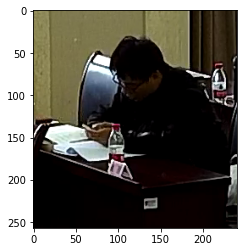

In [30]:
def just_test():
    anno = json.load(open("zixin/annotations/010eb4ebdb1e00f5d81f687ddcff37d0-asset.json", encoding="utf-8"))
    print(anno, '\n')
    print(anno['asset']['name'], anno['regions'][0]['tags'], anno['regions'][0]['boundingBox'], '\n')
    
    img_name = anno['asset']['name'].replace("%5B","[").replace("%5D","]")
    img = cv2.imread(f"zixin/{img_name}")
#     img_ = img[:,:,::-1]
#     plt.imshow(img_)
    
    bbox = anno['regions'][0]['boundingBox']
    x, y, w, h = int(bbox['left']), int(bbox['top']), int(bbox['width']), int(bbox['height'])
    crop_img = img[y:y+h, x:x+w]
    crop_img_ = crop_img[:,:,::-1]
    plt.imshow(crop_img_)
    
    label = anno['regions'][0]['tags'][0]
    actname2idx = {
        "玩手机": 4,
        "睡觉": 1,
        "举手": 2,
        "记笔记": 3
    }
    print(label, actname2idx[label])

just_test()

In [31]:
import os

def process_dir(data_dir, out_dir):
    actname2idx = {
        "玩手机": 4,
        "睡觉": 1,
        "举手": 2,
        "记笔记": 3
    }
    
    listfile = open(os.path.join(out_dir, "listfile.txt"), "w")
    for anno_name in os.listdir(os.path.join(data_dir, "annotations")):
        if anno_name.endswith("asset.json"):
            anno = json.load(open(os.path.join(data_dir, "annotations", anno_name), encoding="utf-8"))
            img_name = anno['asset']['name'].replace("%5B","[").replace("%5D","]")
            img = cv2.imread(os.path.join(data_dir, img_name))
            for idx, region in enumerate(anno['regions']):
                bbox = region['boundingBox']
                x, y, w, h = int(bbox['left']), int(bbox['top']), int(bbox['width']), int(bbox['height'])
                crop_img = img[y:y+h, x:x+w]
                out_img_name = f"person{idx}_{img_name}"
                cv2.imwrite(os.path.join(out_dir, out_img_name), crop_img)
                
                label = region['tags'][0]
                listfile.write(f"{out_img_name},{actname2idx[label]}\n")

In [32]:
process_dir("zixin/", "zixin_crop/")

In [33]:
process_dir("inclass/", "inclass_crop/")